In [2]:
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm

In [33]:
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import linregress
from sklearn import datasets
import numpy as np
import scipy.stats as sp
import datetime

In [63]:
bikes_df=pd.read_csv('bikecounts.csv')
bikes_df.head()

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,4/1/16,4/1/16,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,4/2/16,4/2/16,55.0,48.9,0.15,827,1646,2565,1884,6922
2,4/3/16,4/3/16,39.9,34.0,0.09,526,1232,1695,1306,4759
3,4/4/16,4/4/16,44.1,33.1,0.47 (S),521,1067,1440,1307,4335
4,4/5/16,4/5/16,42.1,26.1,0,1416,2617,3081,2357,9471


# Does a high temperature affect the number of bike trips across the Brooklyn Bridge?




In [4]:
#Formulate a null and an alternative hypothesis for your chosen question.



# A hypothesis - I think that the reason that there is more bike riders during some days than others because of a  
#                higher temperature, such as (60F to 80F) than a lower temperature of (40F to 60F)
     
    
# A null hypothesis- There is no relationships between the higher temperature, such as (60F to 80F) than a lower 
#                temperature of (40F to 60F) and the amount of people that ride bikes per day.


# An alternate hypothesis- Due to the time of year, such as a month closer to summer, which means the average temperature is 
#                 is more than likely more enjoyable.

In [ ]:
#Use the steps that you’ve learned to guide you in performing qualitative and quantitative analyses.

# Scatter Plot

In [17]:
# Viewing the relationship between brighe crossing vs the low temperature and the high temperature

fig = px.scatter(bikes_df, x="Day", y="High Temp (°F)")
fig.show()



In [43]:
# Splitting the month into two parts to take the average temperature
bikes_df['Date'] = pd.to_datetime(bikes_df['Date'])
bikes_df.head()


,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01,4/1/16,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,2016-04-02,4/2/16,55.0,48.9,0.15,827,1646,2565,1884,6922
2,2016-04-03,4/3/16,39.9,34.0,0.09,526,1232,1695,1306,4759
3,2016-04-04,4/4/16,44.1,33.1,0.47 (S),521,1067,1440,1307,4335
4,2016-04-05,4/5/16,42.1,26.1,0,1416,2617,3081,2357,9471


In [41]:
bikes_df[( (bikes_df['Date']>='2016-04-01') & (bikes_df['Date']<='2016-04-15' )) ]["High Temp (°F)"].mean()

53.48

In [42]:
bikes_df[( (bikes_df['Date']>='2016-04-16') & (bikes_df['Date']<='2016-04-30' )) ]["High Temp (°F)"].mean()

67.68

# Histogram Plot

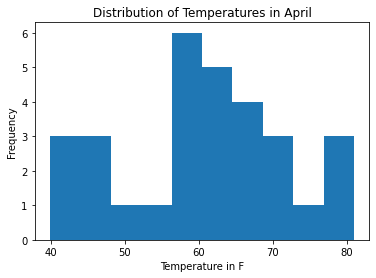

In [8]:
# Viewing the temperature distribution for the month and using this to section the riders for counting



x2=bikes_df['High Temp (°F)']
plt.hist(x2)


plt.xlabel('Temperature in F')
plt.ylabel('Frequency')
plt.title('Distribution of Temperatures in April')

plt.show()


In [9]:
bikes_df[( (bikes_df['High Temp (°F)']>=40) & (bikes_df['High Temp (°F)']<=50)) ]["Brooklyn Bridge"].sum()

7755

In [10]:
bikes_df[( (bikes_df['High Temp (°F)']>=50) & (bikes_df['High Temp (°F)']<=60 )) ]["Brooklyn Bridge"].sum()

10849

In [11]:
bikes_df[( (bikes_df['High Temp (°F)']>=60) & (bikes_df['High Temp (°F)']<=70 )) ]["Brooklyn Bridge"].sum()

30325

In [12]:
bikes_df[( (bikes_df['High Temp (°F)']>=70) & (bikes_df['High Temp (°F)']<=80 )) ]["Brooklyn Bridge"].sum()

16818

# Correlation Maps

Correlation Map Between the High Temperature and bike riders

In [44]:
# Correlation Map between the high temperatures and the bike riders

bike_temperature_df=bikes_df
bike_temperature_df=bikes_df[['Date','High Temp (°F)','Brooklyn Bridge']]
bike_temperature_df.head()



,Date,High Temp (°F),Brooklyn Bridge
0,2016-04-01,78.1,1704
1,2016-04-02,55.0,827
2,2016-04-03,39.9,526
3,2016-04-04,44.1,521
4,2016-04-05,42.1,1416


In [54]:
bike_temperature_df.set_index('Date')
bike_temperature_df.head()




,Date,High Temp (°F),Brooklyn Bridge
0,2016-04-01,78.1,1704
1,2016-04-02,55.0,827
2,2016-04-03,39.9,526
3,2016-04-04,44.1,521
4,2016-04-05,42.1,1416


In [46]:
df_one = pd.DataFrame(bike_temperature_df)
corrM = df_one.corr()
corrM

,High Temp (°F),Brooklyn Bridge
High Temp (°F),1.000000,0.739377
Brooklyn Bridge,0.739377,1.000000


In [47]:
px.imshow(corrM)

In [48]:
corrM.unstack()

High Temp (°F)   High Temp (°F)     1.000000
                 Brooklyn Bridge    0.739377
Brooklyn Bridge  High Temp (°F)     0.739377
                 Brooklyn Bridge    1.000000
dtype: float64

Correlation Map between Low Temperatures and bike riders

In [49]:
# Correlation Map between the low temperatures and the bike riders


bike_temperatures_df=bikes_df
bike_temperatures_df=bikes_df[['Date','Low Temp (°F)','Brooklyn Bridge']]
bike_temperatures_df.head()

,Date,Low Temp (°F),Brooklyn Bridge
0,2016-04-01,66.0,1704
1,2016-04-02,48.9,827
2,2016-04-03,34.0,526
3,2016-04-04,33.1,521
4,2016-04-05,26.1,1416


In [50]:
bike_temperatures_df.set_index('Date')
bike_temperatures_df.head()

,Date,Low Temp (°F),Brooklyn Bridge
0,2016-04-01,66.0,1704
1,2016-04-02,48.9,827
2,2016-04-03,34.0,526
3,2016-04-04,33.1,521
4,2016-04-05,26.1,1416


In [51]:
df_two = pd.DataFrame(bike_temperatures_df)
corrM = df_two.corr()
corrM

,Low Temp (°F),Brooklyn Bridge
Low Temp (°F),1.00000,0.46455
Brooklyn Bridge,0.46455,1.00000


In [52]:
px.imshow(corrM)

In [53]:
corrM.unstack()

Low Temp (°F)    Low Temp (°F)      1.00000
                 Brooklyn Bridge    0.46455
Brooklyn Bridge  Low Temp (°F)      0.46455
                 Brooklyn Bridge    1.00000
dtype: float64

# Linear Regression Models

In [23]:
#Use your knowledge of linear regression models to test the null hypothesis.

x_values = bikes_df['High Temp (°F)']
y_values = bikes_df['Brooklyn Bridge']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)


y = 64.87x + -1660.45


In [55]:
bike_riders_plotly = px.scatter(
    bikes_df,
    x="High Temp (°F)",
    y="Brooklyn Bridge",
    trendline="ols",
    trendline_color_override="red"
)
bike_riders_plotly.update_layout(
    xaxis_title="Temperature",
    yaxis_title="Brooklyn Bridge Riders"
)


In [25]:
results = px.get_trendline_results(bike_riders_plotly)
results.px_fit_results[0].summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     33.77
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           3.05e-06
Time:                        22:24:38   Log-Likelihood:                -237.29
No. Observations:                  30   AIC:                             478.6
Df Residuals:                      28   BIC:                             481.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1660.4539    687.707     -2.414      0.023   -3069.159    -251.749
x1            64.8743     11.164      5.811      0.000      42.005      87.743
==============================================================================
Omnibus:                        2.390   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                2.100
Skew:                          -0.616   Prob(JB):                        0.350
Kurtosis:                       2.599   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analysis

###### Scatter Plots:  

The scatter plot was used to split the month in two parts to get the average temperatures. The temperature varied by almost 15 degrees. There was an average higher temperature at the end of the month.

###### Histogram Plot: 

The Histogram plot shows that there is a greater frequency for temperatures between 40F and 50F but the analysis beneath it shows that there are less riders in that frequency range than in the others. This section confirms that the weather largely influences bike riders.

###### Correlation Matrix: 

The correlation map shows that there is a stronger correlation between the high temperatures and bike riders than low temperatures and bike riders. This states that the temperature is a factor in the amount of riders that rider their bike across the bridge.

###### Linear Regression Model: 

Based on this analysis I will reject the null hypothesis. Every anaylsis shows that there is a relationship between temperature and bike riders on the Brooklyn Bridge.The low P value for for the high temperature is enough reject the null hypothesis. The alternate could be true also due to
the graph showing the temperature towards the second half of the month is higher on average than the beginning of the month, so the data supports that there are more riders for the last 15 days of the month than the first 15 days.